In [1]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from collections import Counter
import re

In [2]:
def get_content(article_name):
    req = requests.get(f'https://en.wikipedia.org/wiki/{article_name}')
    soup = BeautifulSoup(req.content, 'html.parser')
    data = soup.find(id='bodyContent').find_all('p')
    return data

In [3]:
def merge_contents(data):
    return ' '.join(line.text for line in data)

In [4]:
def tokenize(content):
    return re.sub(r"[\(\[].*?[\)\]\)]|[,.\n-]", ' ', content).split()

In [5]:
def remove_stop_words(words, stop_words):
    return Counter(word for word in words if word.isalpha() and word not in stop_words)

In [9]:
def barh(data):
    x, y = zip(*data.items())
    plt.barh(x[::-1], y[::-1], height=0.5, color='blue')
    plt.title('Most common 20 words')
    plt.show()

In [14]:
def main():
  article_name = 'Ozone_layer'
  data = get_content(article_name)
  merge_content = merge_contents(data)
  collection = tokenize(merge_content.lower())
  stop_words = {'the', 'layer', 'ozone', 'of', 'and', 'in', 'to', 'is', 'a', 'an',
                'by', 'that', 'for', 'was', 'were', 'are', 'from',
                'at', 'it', 'as', 'be', 'these', 'on', 'with', 'this',
                'have', 'has', 'other', 'because', 'can', 'its', 'out', 'about',
                'into', 'or', 'over', 'all', 's', 'a', 'b'}

  filtered_collection = remove_stop_words(collection, stop_words)
  most_common = dict(filtered_collection.most_common(20))
  barh(most_common)


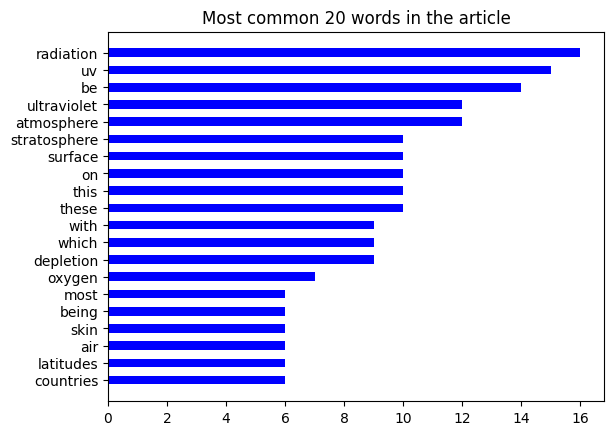

In [15]:
main()